#As the first step, Data preprocessing is done, which includes loading the dataset,cleaning the dataset and then splitting it into training and testing sets with a percentage of 80% to 20%. Finally the data is scaled to a common scale using minmax scaler which ranges the data from 0 to 1

In [1]:

import pandas as pd

#load the dataset and include headers
headers = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 
           'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
           'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
           'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
           'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
           'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
           'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
           'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
           'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
           'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
           'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average',
           'capital_run_length_longest', 'capital_run_length_total', 'spam']

dataset=pd.read_csv('dataset/spambase.data',header=None, names=headers)


In [2]:
#1. EMPTY VALUES

#checking if there are empty values
print(dataset.isnull().sum())

#'There are no missing values'


word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [3]:
#2.DUPLICATES

#checking for duplicate values
duplicate=dataset.duplicated()
num_duplicates = duplicate.sum()
print('number of duplicates :', num_duplicates)
#removing duplicate values
dataset=dataset.drop_duplicates()


duplicate=dataset.duplicated()
num_duplicates = duplicate.sum()
print('number of duplicates (after):',num_duplicates)
print(dataset)

number of duplicates : 391
number of duplicates (after): 0
      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \

In [4]:
#SPLITTING THE DATASET INTO TRAINING AND TESTING
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dataset.iloc[:, :-1], dataset.iloc[:, -1], test_size=0.2, random_state=42)

In [5]:
#scaling the data to improve performance
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
X_train_= scaler.fit_transform(X_train)
X_test_=scaler.transform(X_test)



#KNN model is trained. first the best hyperparameters are taken using gridsearchCv and then those selected hyperparameters are instantiated and the model is trained.

In [6]:
##getting the best hyperparameters

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameter grid to get the best hyperparameters
param_grid = {'n_neighbors': np.arange(1, 20),'weights': ['uniform', 'distance'],'p': [1, 2]}

# Create a grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train_, y_train)

# Print the best hyperparameters and accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


Best hyperparameters: {'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
Best accuracy: 0.9094426391418027


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate the KNN model with the selected hyperparameters
knn_model = KNeighborsClassifier(n_neighbors=6, weights='distance', p=1)

# Train the KNN model on the training set
knn_model.fit(X_train_, y_train)


y_pred = knn_model.predict(X_test_)

# Evaluate the performance of the KNN model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9121140142517815
Precision: 0.9411764705882353
Recall: 0.8467966573816156
F1 score: 0.8914956011730205


In [8]:
#generating the classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       483
           1       0.94      0.85      0.89       359

    accuracy                           0.91       842
   macro avg       0.92      0.90      0.91       842
weighted avg       0.91      0.91      0.91       842



[[464  19]
 [ 55 304]]


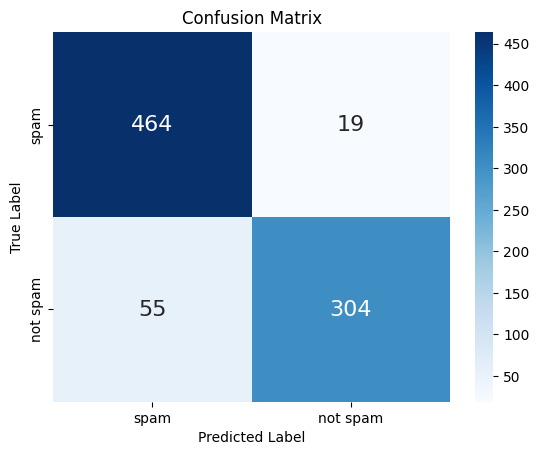

In [17]:
#confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

classes = ['spam', 'not spam']
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
sns.heatmap(matrix, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 16}, xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Decision tree model is trained. First the best hyperparameters are taken using gridsearchCv and then those selected hyperparameters are instantiated and the model is trained.

In [29]:
##getting the best hyperparameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# instantiate the decision tree model
dt = DecisionTreeClassifier(random_state=42)

# define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_, y_train)

# print the best hyperparameters
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [36]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=1, min_samples_split=2,random_state=42)
dt.fit(X_train, y_train)

# predict the labels of the testing set
predictions_test = dt.predict(X_test_)

# evaluate the performance of the model
accuracy = accuracy_score(y_test, predictions_test)
precision = precision_score(y_test, predictions_test)
recall = recall_score(y_test, predictions_test)
f1 = f1_score(y_test, predictions_test)

# print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

train_accuracy = dt.score(X_train, y_train)
print("Training accuracy:", train_accuracy)


Accuracy: 0.6389548693586699
Precision: 0.9365079365079365
Recall: 0.16434540389972144
F1 score: 0.2796208530805687
Training accuracy: 0.9673396674584323


c:\Users\Asus\Desktop\ML\cw\Nazeefa_20210076_ML-CW\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [37]:
#generating the classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       483
           1       0.94      0.85      0.89       359

    accuracy                           0.91       842
   macro avg       0.92      0.90      0.91       842
weighted avg       0.91      0.91      0.91       842



[[464  19]
 [ 55 304]]


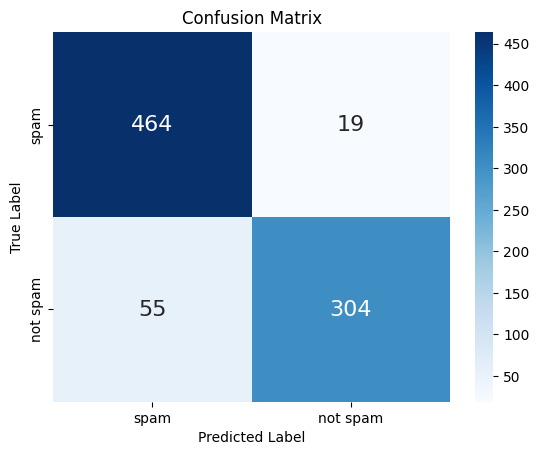

In [38]:
#confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

classes = ['spam', 'not spam']
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
sns.heatmap(matrix, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 16}, xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

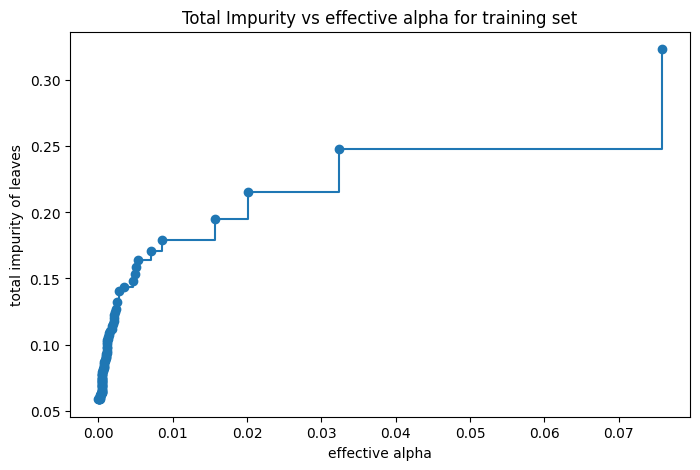

In [40]:
#pruning 
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [42]:
dts = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    dts.append(dt)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      dts[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.15311985148749657


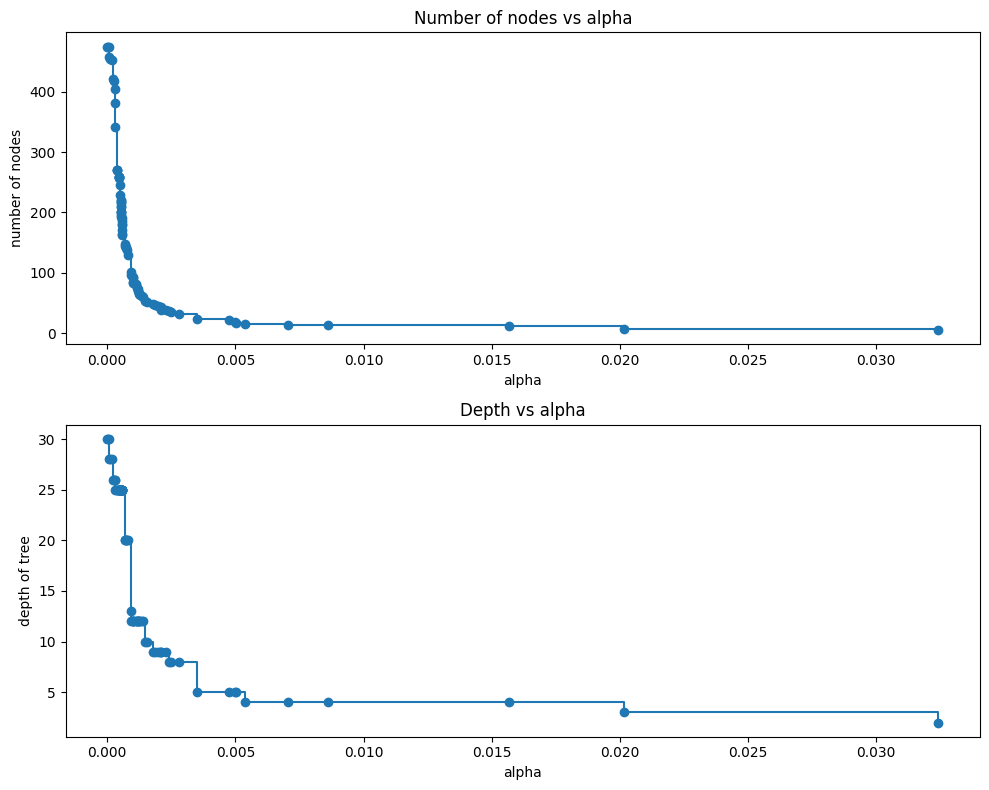

In [44]:
dts = dts[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [dt.tree_.node_count for dt in dts]
depth = [dt.tree_.max_depth for dt in dts]
fig, ax = plt.subplots(2, 1,figsize=(10,8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

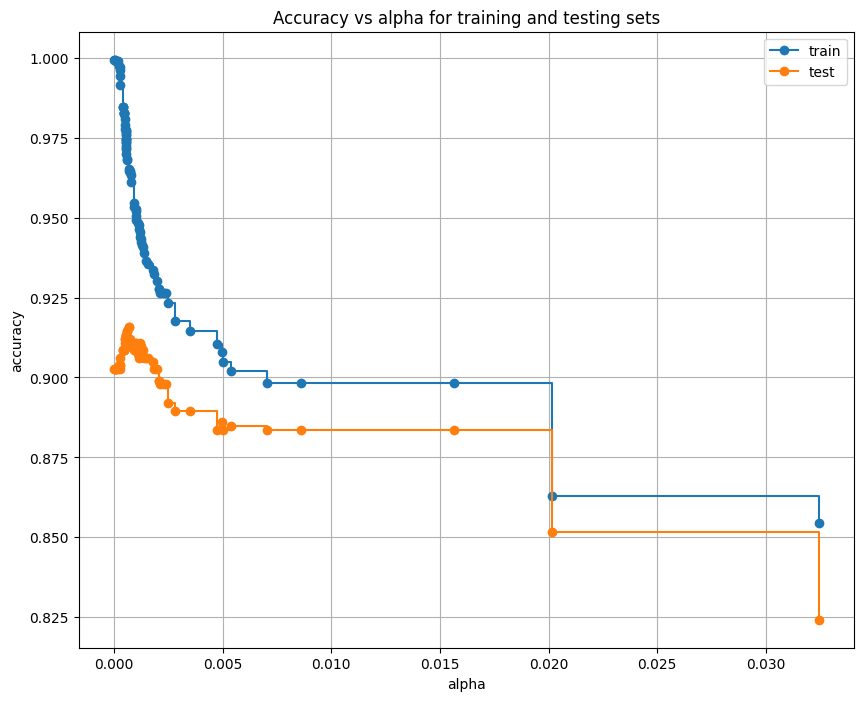

In [45]:
train_scores = [dt.score(X_train, y_train) for dt in dts]
test_scores = [dt.score(X_test, y_test) for dt in dts]

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

In [50]:
#accuracy after pruning
dt = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
dt.fit(X_train,y_train)

#testing dataset
from sklearn.metrics import accuracy_score
pred=dt.predict(X_test)
print('testing dataset',accuracy_score(y_test, pred))

#training dataset
pred_1 = dt.predict(X_train)
print('training dataset',accuracy_score(y_train,pred_1))




testing dataset 0.8669833729216152
training dataset 0.8752969121140143
